In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [3]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion', 'hack_license',
                          'pickup_hour', 'pickup_day_of_month', 'pickup_day_of_week',
                         'pickup_longitude', 'pickup_latitude'])

df.head()

,medallion,hack_license,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_month,pickup_day_of_week
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,15,25,Monday
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,15,25,Monday
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,9,25,Monday
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,6,25,Monday
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,10,25,Monday


In [4]:
# Total number of taxis
len(df.medallion.unique())

13295

In [5]:
# Total number of licenses
len(df.hack_license.unique())

33005

In [6]:
# total trips
len(df)

13940521

# Times

### What are the busiest times

In [11]:
# create a weekend ind
df['day_type'] = 'Weekday'
weekend_days = ['Saturday', 'Sunday']

df.loc[df['pickup_day_of_week'].isin(weekend_days), 'day_type'] = 'Weekend'

df.head()

,medallion,hack_license,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_month,pickup_day_of_week,day_type
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,15,25,Monday,Weekday
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,15,25,Monday,Weekday
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,9,25,Monday,Weekday
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,6,25,Monday,Weekday
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,10,25,Monday,Weekday


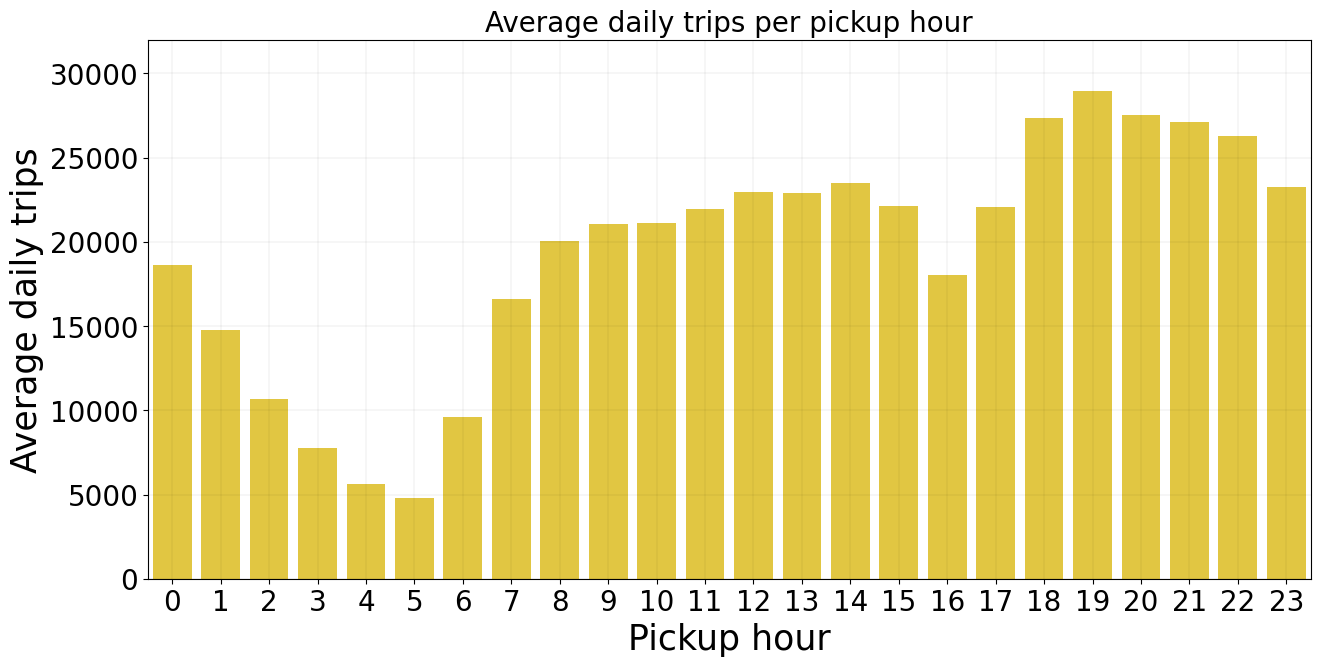

In [41]:
average_trips_per_hour = df.groupby('pickup_hour')['medallion'].count().reset_index().rename(columns={'medallion': 'trips'})
average_trips_per_hour['trips'] = average_trips_per_hour['trips']/30 # days in nov

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=average_trips_per_hour,
           x='pickup_hour', y='trips',
           color='#FBD827')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

plt.ylim(0, 32000)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average daily trips per pickup hour",fontsize=20)
ax.set_xlabel("Pickup hour",fontsize=25)
ax.set_ylabel("Average daily trips",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

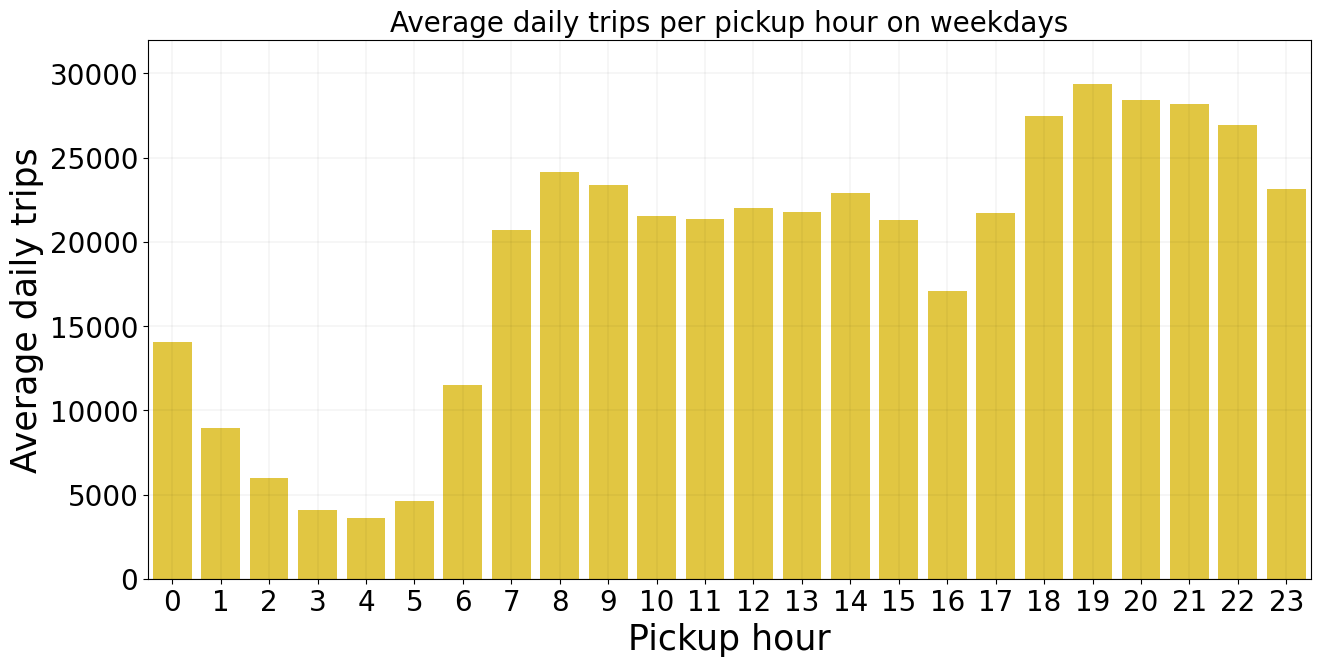

In [39]:
average_trips_per_hour_weekday = df[df['day_type']=='Weekday'].groupby('pickup_hour')['medallion'].count().reset_index().rename(columns={'medallion': 'trips'})
average_trips_per_hour_weekday['trips'] = average_trips_per_hour_weekday['trips']/21 # 21 weekdays in nov 2013

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=average_trips_per_hour_weekday,
           x='pickup_hour', y='trips',
           color='#FBD827')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

plt.ylim(0, 32000)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average daily trips per pickup hour on weekdays",fontsize=20)
ax.set_xlabel("Pickup hour",fontsize=25)
ax.set_ylabel("Average daily trips",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

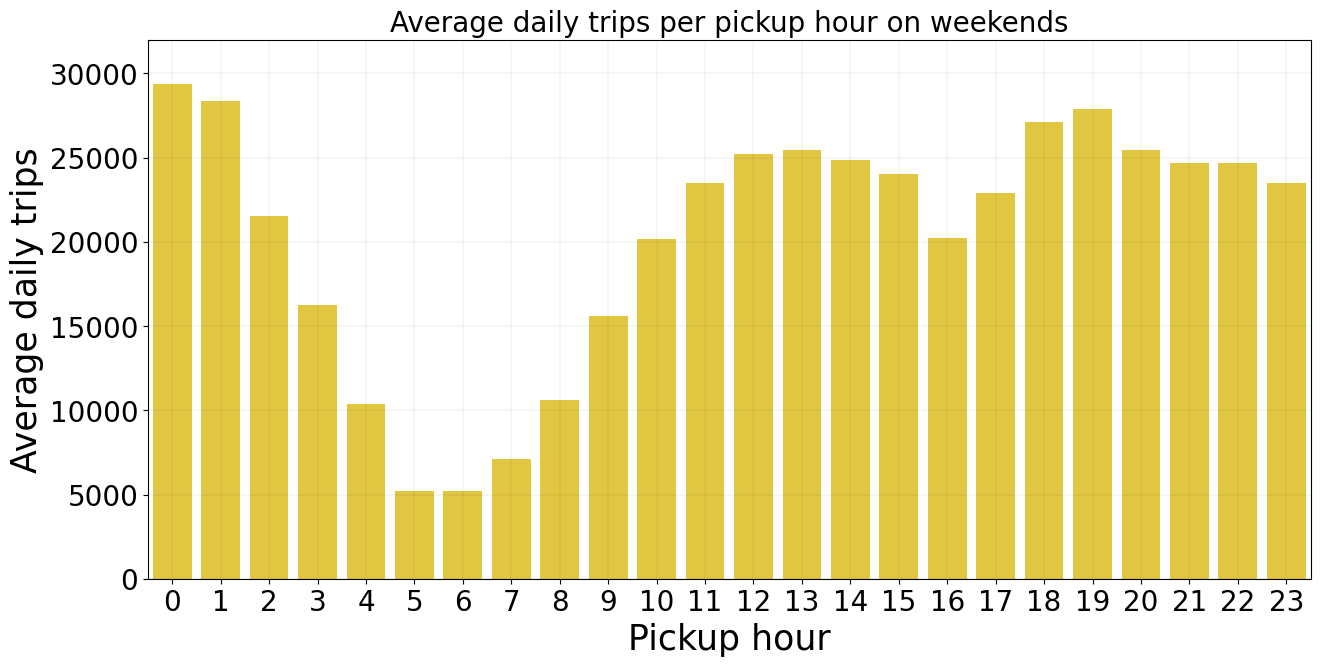

In [42]:
average_trips_per_hour_weekend = df[df['day_type']=='Weekend'].groupby('pickup_hour')['medallion'].count().reset_index().rename(columns={'medallion': 'trips'})
# 9 weekend days in november
average_trips_per_hour_weekend['trips'] = average_trips_per_hour_weekend['trips']/9

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=average_trips_per_hour_weekend,
           x='pickup_hour', y='trips',
           color='#FBD827')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

plt.ylim(0, 32000)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average daily trips per pickup hour on weekends",fontsize=20)
ax.set_xlabel("Pickup hour",fontsize=25)
ax.set_ylabel("Average daily trips",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 20);
ax.xaxis.set_tick_params(labelsize = 20);

plt.grid(True, color='black', linewidth=.05)

plt.show()

In [63]:
driver_per_hour_and_day_of_month = df.drop_duplicates(['pickup_hour', 'pickup_day_of_month', 'medallion'])

driver_per_hour_and_day_of_month = driver_per_hour_and_day_of_month.groupby(['pickup_day_of_month', 'pickup_hour'])['medallion'].count().reset_index().rename(columns={'medallion': 'drivers'})
driver_per_hour_and_day_of_month

,pickup_day_of_month,pickup_hour,drivers
0,1,0,9857
1,1,1,9051
2,1,2,7753
3,1,3,6140
4,1,4,4444
...,...,...,...
715,30,19,10167
716,30,20,10144
717,30,21,10022
718,30,22,10057


In [64]:
driver_per_hour_and_day_of_month.groupby('pickup_hour')['drivers'].mean().reset_index()

,pickup_hour,drivers
0,0,7994.933333
1,1,6274.400000
2,2,4883.000000
3,3,3822.900000
4,4,3111.500000
5,5,2928.366667
6,6,4761.900000
7,7,6818.833333
8,8,7982.666667
9,9,8759.433333


In [ ]:
# Check for revenure per driver in the hours rather than 

<Axes: xlabel='pickup_hour', ylabel='drivers'>

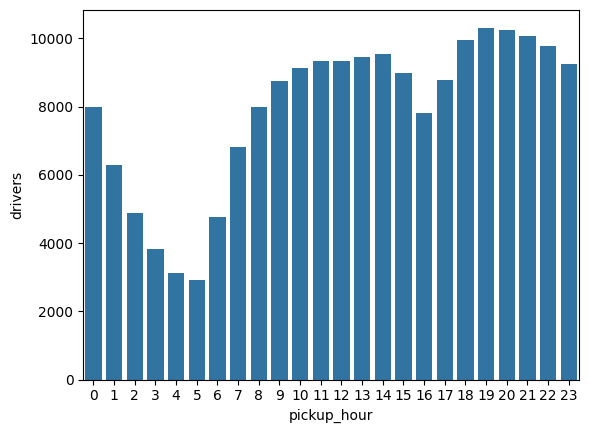

In [65]:
drivers_working_per_hour = driver_per_hour_and_day_of_month.groupby('pickup_hour')['drivers'].mean().reset_index()

sns.barplot(data=drivers_working_per_hour,
           x='pickup_hour', y='drivers')

<Axes: xlabel='hour', ylabel='trips_per_driver'>

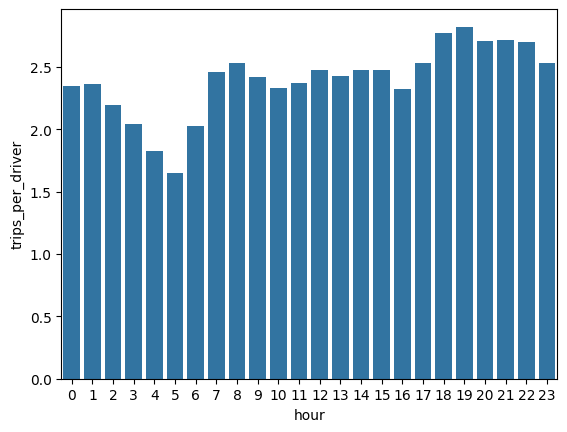

In [66]:
trips_per_driver_df = pd.DataFrame((total_trips_per_hour['trips']/drivers_working_per_hour['drivers']), columns=['trips_per_driver'])

trips_per_driver_df['hour'] = trips_per_driver_df.index

sns.barplot(data=trips_per_driver_df,
           x='hour', y='trips_per_driver')


In [67]:
trips_per_driver_df.sort_values('trips_per_driver', ascending=False)

,trips_per_driver,hour
19,2.823721,19
18,2.771501,18
21,2.714164,21
20,2.708972,20
22,2.703589,22
17,2.534131,17
8,2.531715,8
23,2.531452,23
14,2.480349,14
15,2.479979,15


In [69]:
average_trips_per_hour.sort_values('trips', ascending=False)

,pickup_hour,trips
19,19,29121.133333
20,20,27745.566667
18,18,27553.800000
21,21,27285.400000
22,22,26453.533333
14,14,23632.600000
23,23,23398.800000
12,12,23107.900000
13,13,23005.666667
15,15,22257.566667


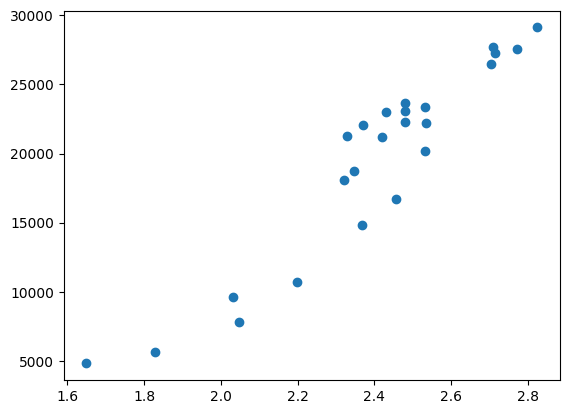

In [70]:
plt.scatter(trips_per_driver_df['trips_per_driver'], average_trips_per_hour['trips'])

# Location

### What are the busiest locations?

In [89]:
round_to = 3
df['rounded_lat'] = df['pickup_latitude'].round(round_to)
df['rounded_long'] = df['pickup_longitude'].round(round_to)
df

,medallion,hack_license,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_month,pickup_day_of_week,day_type,rounded_lat,rounded_long
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,-73.978104,40.752968,15,25,Monday,Weekday,40.753,-73.978
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,-73.982315,40.764828,15,25,Monday,Weekday,40.765,-73.982
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,-73.982010,40.762508,9,25,Monday,Weekday,40.763,-73.982
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,-73.976006,40.744480,6,25,Monday,Weekday,40.744,-73.976
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,-73.952621,40.780964,10,25,Monday,Weekday,40.781,-73.953
...,...,...,...,...,...,...,...,...,...,...
13940516,981161555DEE587A5BC8C928CB2514AE,F371B99C7A715A375CD4B035C32732E5,-73.949677,40.776268,4,25,Monday,Weekday,40.776,-73.950
13940517,926291789F6E904E920508D584D93301,F7D2634D82BEFEFCEAFCD9D7A5C2846A,-73.975464,40.755527,8,25,Monday,Weekday,40.756,-73.975
13940518,B5A2A6106AC22D527F0DAF3E68E6E320,E1A4A83FA1BEA573C823984082C6BFED,-74.003677,40.748505,14,25,Monday,Weekday,40.749,-74.004
13940519,BE214ADD26750400C52407093C441701,D9573F449F1B17818F9485EB5E319E1F,-73.974876,40.782822,4,25,Monday,Weekday,40.783,-73.975


In [90]:
rounded_areas_trips_tiny = df[['rounded_lat', 'rounded_long']].value_counts().reset_index().rename(
    columns={'count': 'Total Trips'}
)
rounded_areas_trips_tiny

,rounded_lat,rounded_long,Total Trips
0,40.751,-73.994,63903
1,40.750,-73.992,52825
2,40.750,-73.991,51449
3,40.774,-73.871,49673
4,40.769,-73.863,49109
...,...,...,...
25073,40.909,-73.908,1
25074,40.909,-73.878,1
25075,40.909,-73.877,1
25076,40.909,-73.780,1


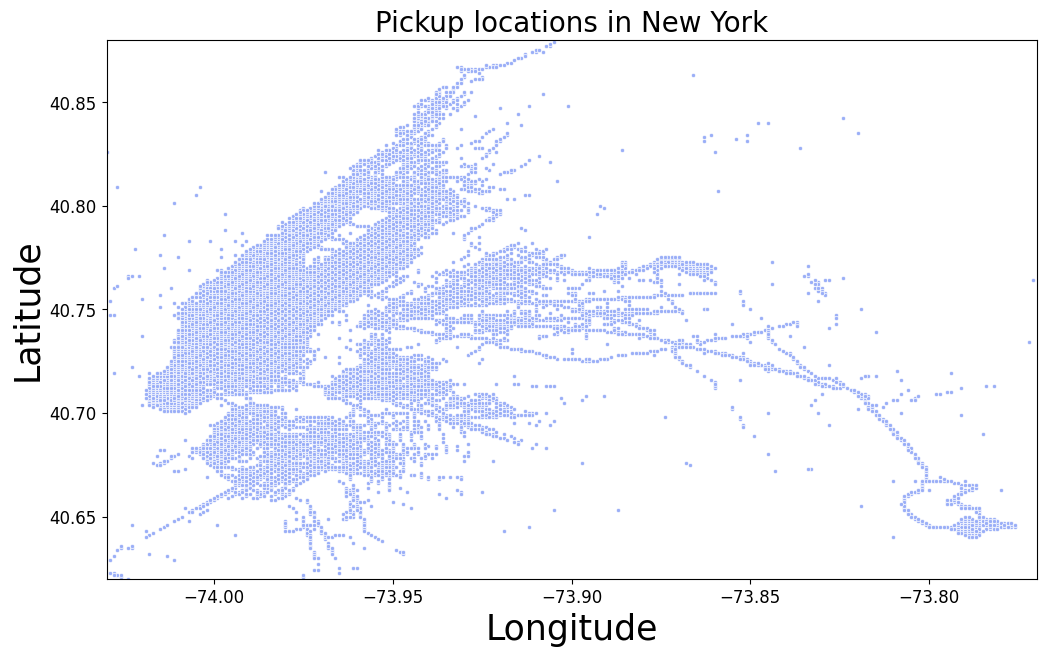

In [125]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_long",
                y="rounded_lat",
                data=rounded_areas_trips_tiny.head(10000),
                # hue="Total Trips",
                color='#9BAFF7',
               marker='.')

plt.ylim(40.62, 40.88)  # Set the y-axis limits
plt.xlim(-74.03, -73.77)  # Set the y-axis limits

ax.set_title("Pickup locations in New York",fontsize=20)
ax.set_xlabel("Longitude",fontsize=25)
ax.set_ylabel("Latitude",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);


In [92]:
# Top locations

In [96]:
round_to = 3
df['rounded_lat'] = df['pickup_latitude'].round(round_to)
df['rounded_long'] = df['pickup_longitude'].round(round_to)

rounded_areas_trips = df[['rounded_lat', 'rounded_long']].value_counts().reset_index().rename(
    columns={'count': 'Total Trips'}
)
rounded_areas_trips

,rounded_lat,rounded_long,Total Trips
0,40.751,-73.994,63903
1,40.750,-73.992,52825
2,40.750,-73.991,51449
3,40.774,-73.871,49673
4,40.769,-73.863,49109
...,...,...,...
25073,40.909,-73.908,1
25074,40.909,-73.878,1
25075,40.909,-73.877,1
25076,40.909,-73.780,1


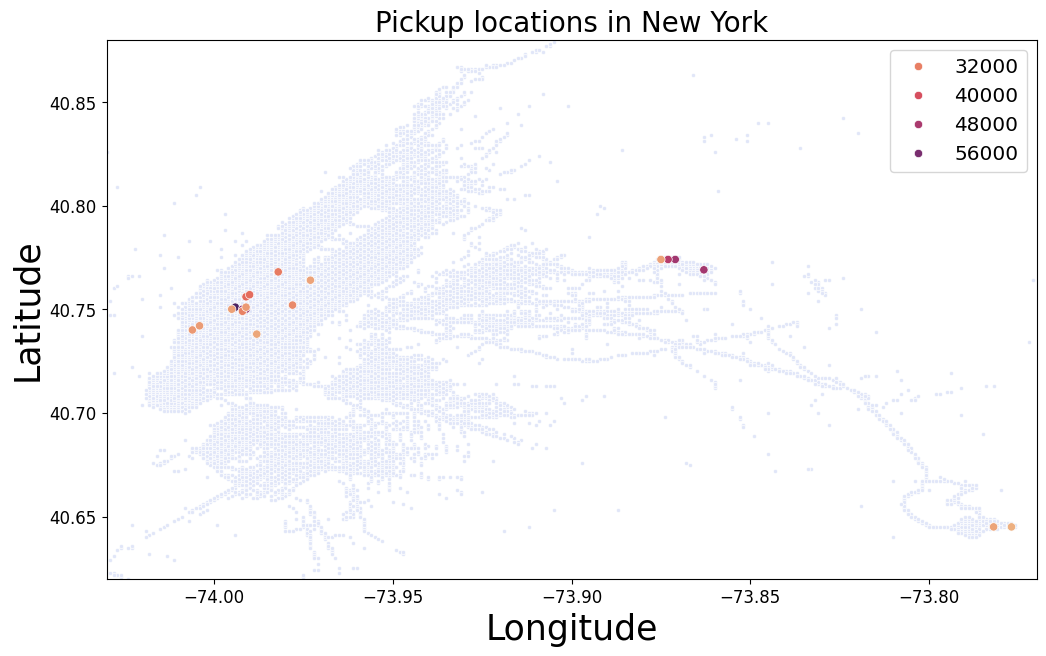

In [124]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="rounded_long",
                y="rounded_lat",
                data=rounded_areas_trips_tiny.head(10000),
                # hue="Total Trips",
                color='#E1E6F8',
               marker='.')

sns.scatterplot(x="rounded_long",
                y="rounded_lat",
                data=rounded_areas_trips.head(20),
                hue="Total Trips",
                palette=sns.color_palette("flare", as_cmap=True),
               marker='o')


plt.ylim(40.62, 40.88)  # Set the y-axis limits
plt.xlim(-74.03, -73.77)  # Set the y-axis limits

ax.set_title("Pickup locations in New York",fontsize=20)
ax.set_xlabel("Longitude",fontsize=25)
ax.set_ylabel("Latitude",fontsize=25)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.legend(fontsize='x-large')
